In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

# Tetrádica

In [3]:
# Lê arquivo com transições binárias, ignorando V|0V e v|0v e casos estranhos onde V ou v é caractere vazio
transicoes_totais = []
with open("RBAs acumuladas - tétrades SUPERCORPUS.txt") as file:
    for line in file:
        transicoes_totais.append(line.rstrip('\n'))

# Transforma a lista de transições binárias em uma lista de listas, com transições binárias por música
musicas = [[]]
for transicao in transicoes_totais:
    if transicao == '---':
        musicas.append([])
    else:
        musicas[-1].append(transicao)

# Remove a última (sempre é vazia)
del musicas[-1]

In [4]:
# Inicializa matriz de contagem

tipos_acordais = {'Z': 'M7',
                  'Y': '7',
                  'X': '(b5)7',
                  'W': '(#5)7',
                  'V': '',
                  'z': 'm7',
                  'y': 'ø',
                  'x': '°7',
                  'w': 'm(M7)',
                  'v': 'm'}

fundamentais = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

acordes = []

for fundamental in fundamentais:
    for tipo in tipos_acordais:
        acordes.append(fundamental + tipos_acordais[tipo])

matriz_de_contagem = pd.DataFrame(0, index = acordes, columns = acordes)

display(matriz_de_contagem)

,CM7,C7,C(b5)7,C(#5)7,C,Cm7,Cø,C°7,Cm(M7),Cm,...,BM7,B7,B(b5)7,B(#5)7,B,Bm7,Bø,B°7,Bm(M7),Bm
CM7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C(b5)7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C(#5)7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bm7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bø,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B°7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bm(M7),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
for partida_inicial in fundamentais:
    # Itera pelas musicas
    for musica in musicas:
        fundamental_de_partida = partida_inicial
        # Itera pelas transições de cada música para atualizar a matriz de contagem
        for transicao in musica:
            tipo_de_partida = transicao[0]
            tipo_de_chegada = transicao[-1]
            
            passo = int(re.findall(r'\d+', transicao)[0])
            fundamental_de_chegada = fundamentais[(fundamentais.index(fundamental_de_partida) + passo)%12]

            acorde_de_partida = fundamental_de_partida + tipos_acordais[tipo_de_partida]
            acorde_de_chegada = fundamental_de_chegada + tipos_acordais[tipo_de_chegada]

            matriz_de_contagem[acorde_de_chegada][acorde_de_partida] += 1

            fundamental_de_partida = fundamental_de_chegada

,CM7,C7,C(b5)7,C(#5)7,C,Cm7,Cø,C°7,Cm(M7),Cm,...,BM7,B7,B(b5)7,B(#5)7,B,Bm7,Bø,B°7,Bm(M7),Bm
CM7,0,95,0,3,15,84,4,13,11,1,...,33,145,1,5,4,88,33,3,2,11
C7,21,0,7,10,22,208,20,3,2,18,...,122,203,2,1,14,86,9,4,7,10
C(b5)7,0,7,0,0,0,1,0,0,0,0,...,3,2,1,0,0,0,0,0,0,0
C(#5)7,0,4,1,0,0,4,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
C,49,114,0,1,0,27,1,3,1,51,...,5,37,0,0,41,24,12,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bm7,46,15,0,0,5,10,0,29,0,0,...,18,77,1,2,5,0,5,1,25,11
Bø,0,4,0,0,0,0,0,0,0,0,...,0,1,0,2,0,8,0,2,0,1
B°7,8,17,0,0,1,69,4,0,0,30,...,7,1,0,0,4,7,0,0,0,1
Bm(M7),2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,111,2,0,0,4


<AxesSubplot:>

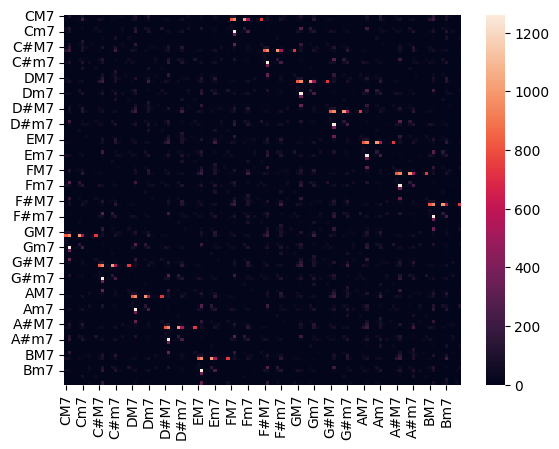

In [6]:
np.fill_diagonal(matriz_de_contagem.values, 0)

display(matriz_de_contagem)

sns.heatmap(matriz_de_contagem)

,CM7,C7,C(b5)7,C(#5)7,C,Cm7,Cø,C°7,Cm(M7),Cm,...,BM7,B7,B(b5)7,B(#5)7,B,Bm7,Bø,B°7,Bm(M7),Bm
CM7,0.000000,0.045564,0.000000,0.001439,0.007194,0.040288,0.001918,0.006235,0.005276,0.000480,...,0.015827,0.069544,0.000480,0.002398,0.001918,0.042206,0.015827,0.001439,0.000959,0.005276
C7,0.003263,0.000000,0.001088,0.001554,0.003418,0.032318,0.003108,0.000466,0.000311,0.002797,...,0.018956,0.031541,0.000311,0.000155,0.002175,0.013362,0.001398,0.000622,0.001088,0.001554
C(b5)7,0.000000,0.120690,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,...,0.051724,0.034483,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C(#5)7,0.000000,0.039216,0.009804,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.009804,0.009804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.022323,0.051936,0.000000,0.000456,0.000000,0.012301,0.000456,0.001367,0.000456,0.023235,...,0.002278,0.016856,0.000000,0.000000,0.018679,0.010934,0.005467,0.000000,0.000000,0.005011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bm7,0.012991,0.004236,0.000000,0.000000,0.001412,0.002824,0.000000,0.008190,0.000000,0.000000,...,0.005083,0.021745,0.000282,0.000565,0.001412,0.000000,0.001412,0.000282,0.007060,0.003106
Bø,0.000000,0.007782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001946,0.000000,0.003891,0.000000,0.015564,0.000000,0.003891,0.000000,0.001946
B°7,0.016194,0.034413,0.000000,0.000000,0.002024,0.139676,0.008097,0.000000,0.000000,0.060729,...,0.014170,0.002024,0.000000,0.000000,0.008097,0.014170,0.000000,0.000000,0.000000,0.002024
Bm(M7),0.012500,0.000000,0.000000,0.000000,0.000000,0.006250,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693750,0.012500,0.000000,0.000000,0.025000


<AxesSubplot:>

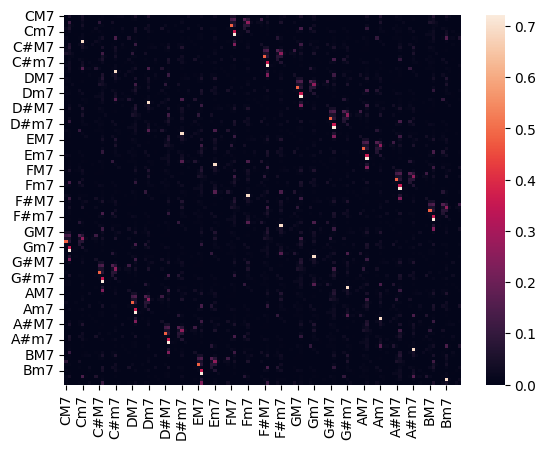

In [7]:
# Normalizar matriz de contagem para se tornar matriz de transição
matriz_de_transicao = matriz_de_contagem.div(matriz_de_contagem.sum(axis = 1), axis = 0)

display(matriz_de_transicao)

sns.heatmap(matriz_de_transicao)

In [10]:
matriz_de_transicao.to_csv('matriz_de_transicao.csv')
matriz_de_transicao_load = pd.read_csv('matriz_de_transicao.csv', sep = ',', decimal = '.', header = 0, index_col = 0)
matriz_de_transicao_load
((matriz_de_transicao_load - matriz_de_transicao) > 1e-25).sum().sum()

0

In [34]:
len(matriz_de_transicao)

120

# Templates

In [8]:
templates_em_C = {'M7': [0, 4, 7, 11],
                  '7': [0, 4, 7, 10],
                  '(b5)7': [0, 4, 6, 10],
                  '(#5)7': [0, 4, 8, 10],
                  '': [0, 4, 7],
                  'm7': [0, 3, 7, 10],
                  'ø': [0, 3, 6, 10],
                  '°7': [0, 3, 6, 9],
                  'm(M7)': [0, 3, 7, 11],
                  'm': [0, 3, 7]}

templates = pd.DataFrame(0, index = range(12), columns = acordes)

display(templates)

,CM7,C7,C(b5)7,C(#5)7,C,Cm7,Cø,C°7,Cm(M7),Cm,...,BM7,B7,B(b5)7,B(#5)7,B,Bm7,Bø,B°7,Bm(M7),Bm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for fundamental in fundamentais:
    for tipo in templates_em_C:
        for nota in templates_em_C[tipo]:
            templates[fundamental + tipo][(fundamentais.index(fundamental) + nota)%12] = 1

display(templates)

,CM7,C7,C(b5)7,C(#5)7,C,Cm7,Cø,C°7,Cm(M7),Cm,...,BM7,B7,B(b5)7,B(#5)7,B,Bm7,Bø,B°7,Bm(M7),Bm
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
3,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
4,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
6,0,0,1,0,0,0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,1
7,1,1,0,0,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,1,1,1,0,1,1,0,0,0


In [29]:
test_templates = templates.to_numpy()
print((test_templates))

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 1 0]
 [1 0 0 ... 1 1 1]]


In [28]:
test = np.ones((12, 120))
print((test))

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
